In [411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression, Ridge

plt.rcParams['figure.figsize'] = [10, 5]

## Curve fitting with B splines


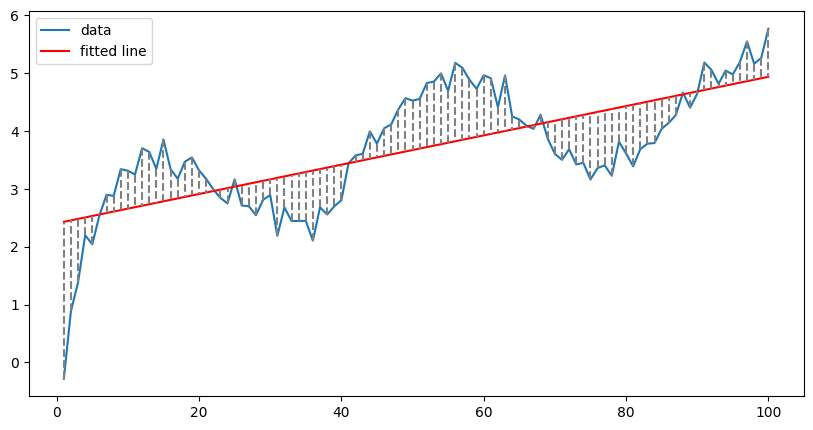

In [584]:
# define our function
def f(x):
    return np.log(x) + np.sin(x/7) 

x = np.linspace(1, 100, 100)
x = x.reshape(-1, 1)
y = f(x)
y = y+np.random.normal(0, 0.2, y.shape)

# fit a linear model
model = LinearRegression()
model.fit(x, y)
line = model.predict(x)

plt.plot(x, y)
plt.plot(x, line, color='red')
plt.legend(['data', 'fitted line'])
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], line[i]], color='gray', linestyle='dashed')

plt.show()

# clearly the line doesn't fit the data well
Now we create splines of degree 1

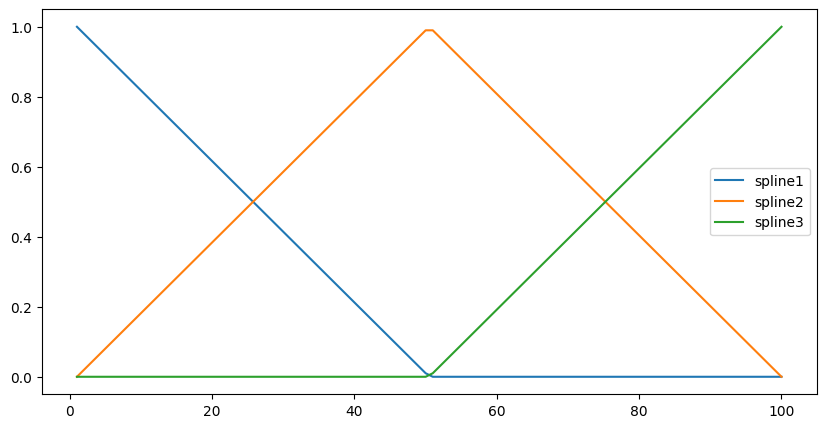

In [585]:
spline = SplineTransformer(n_knots=3, degree=1, knots='uniform')
x_spline = spline.fit_transform(x)

cols = [str(i) for i in range(x_spline.shape[1])]
x_spline = pd.DataFrame(x_spline, columns=cols)

for i in range(x_spline.shape[1]):
    plt.plot(x, x_spline[str(i)])
plt.legend([f'spline{i+1}' for i in range(x_spline.shape[1])])


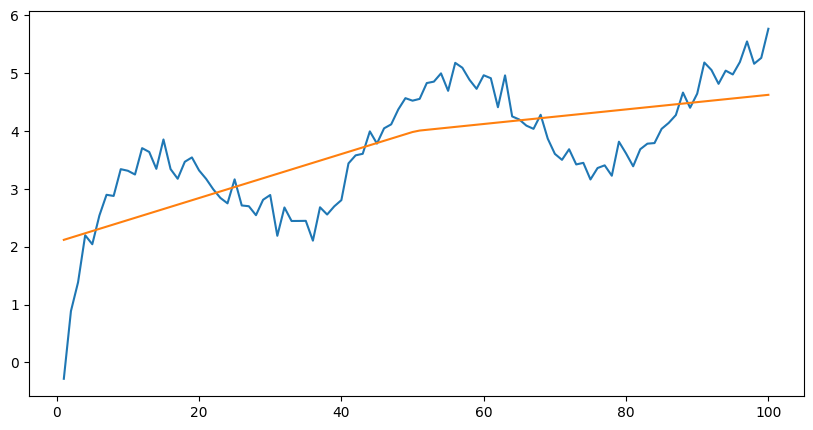

In [587]:
model = LinearRegression()
model.fit(x_spline, y)
line = model.predict(x_spline)

plt.plot(x, y)
plt.plot(x, line)


With 3 knots there is a bend in the line   
There are also knots at 0 and 100  
Now let's try with more knots

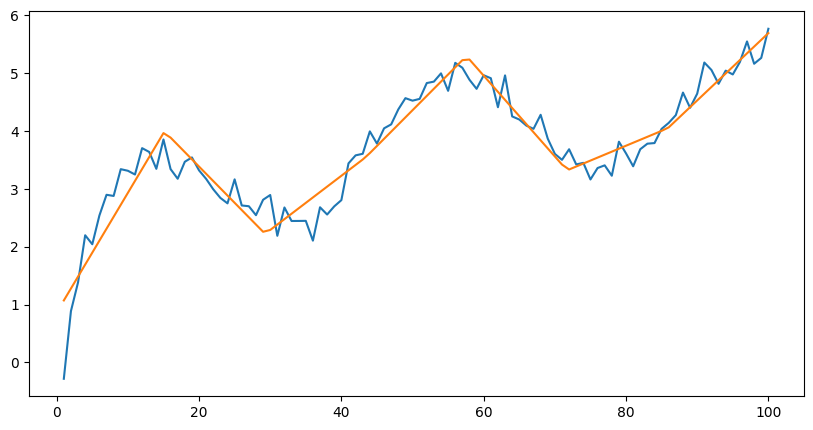

In [588]:
spline = SplineTransformer(n_knots=8, degree=1, knots='uniform')
x_spline = spline.fit_transform(x)
model = LinearRegression()
model.fit(x_spline, y)
line = model.predict(x_spline)

plt.plot(x, y)
plt.plot(x, line)

# Curves
We are still only using lines to fit our data, by using higher degree polynomials we can get a better fit

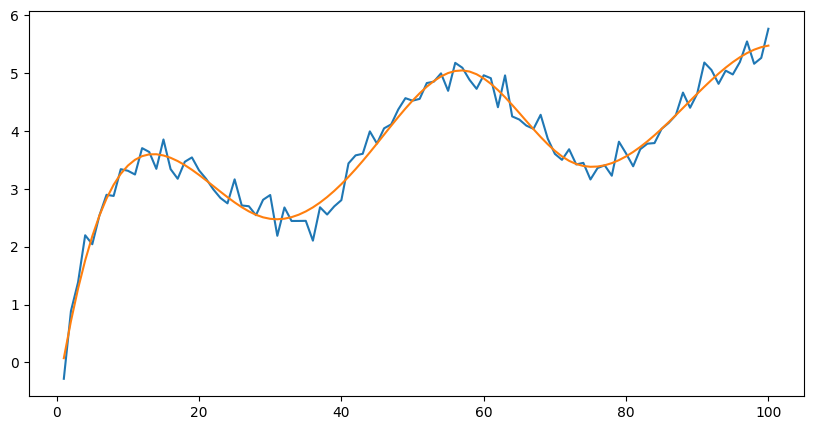

In [589]:
spline = SplineTransformer(n_knots=8, degree=3, knots='uniform')
x_spline = spline.fit_transform(x)
model = LinearRegression()
model.fit(x_spline, y)
line = model.predict(x_spline)

plt.plot(x, y)
plt.plot(x, line)

This is what the splines look like now that they are of degree 3

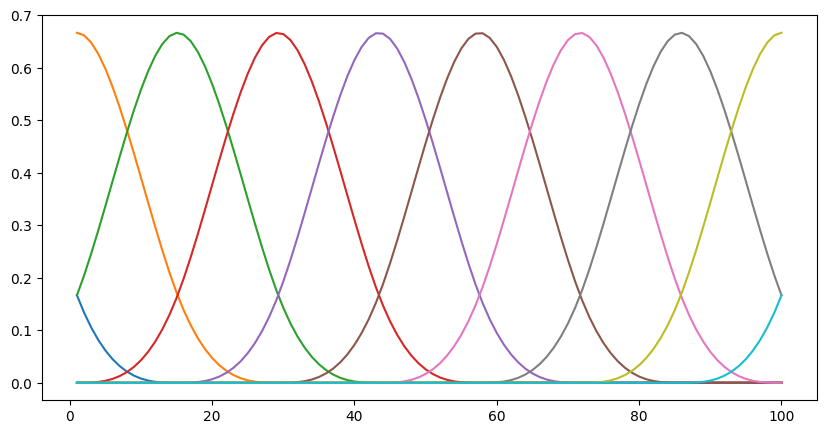

In [591]:
cols = [str(i) for i in range(x_spline.shape[1])]
x_spline = pd.DataFrame(x_spline, columns=cols)

for i in range(x_spline.shape[1]):
    plt.plot(x, x_spline[str(i)])

# Overfitting
If there is lots of noise in the data, using too many knots can lead to overfitting.  
we can use regularization to combat this.

linear model score 0.2640769134322378
ridge model score 0.7030354805610053


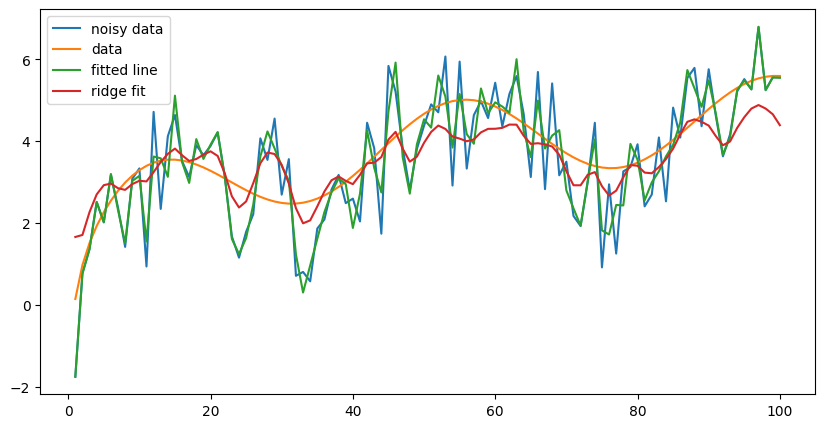

In [609]:
y = f(x)
y_n = y+np.random.normal(0, 1, y.shape)
spline = SplineTransformer(n_knots=75, degree=4, knots='uniform')
x_spline = spline.fit_transform(x)

ridge = Ridge(alpha=1)

model.fit(x_spline, y_n)
ridge.fit(x_spline, y_n)

line = model.predict(x_spline)
rifge_fit = ridge.predict(x_spline)


plt.plot(x, y_n)
plt.plot(x, y)
plt.plot(x, line)
plt.plot(x, rifge_fit)
plt.legend(['noisy data', 'data', 'fitted line', 'ridge fit'])

print('linear model score', model.score(x_spline, y))
print('ridge model score', ridge.score(x_spline, y))
plt.show()

The actual function is shown in orange. Because there is so much noise, the tendency is to overfit.   
The ridge model uses the L2 penalty to limit overfitting.    
# We can view the distribution of the coefficients to verify this

<Axes: title={'center': 'ridge model coefficients'}, ylabel='Frequency'>

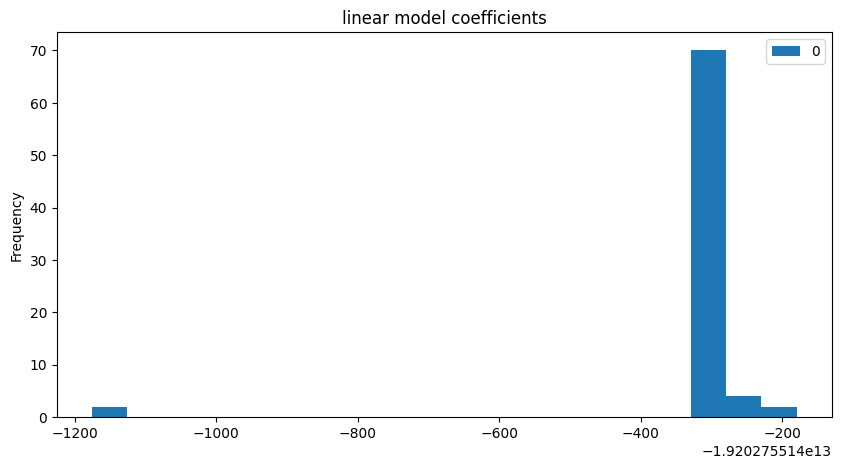

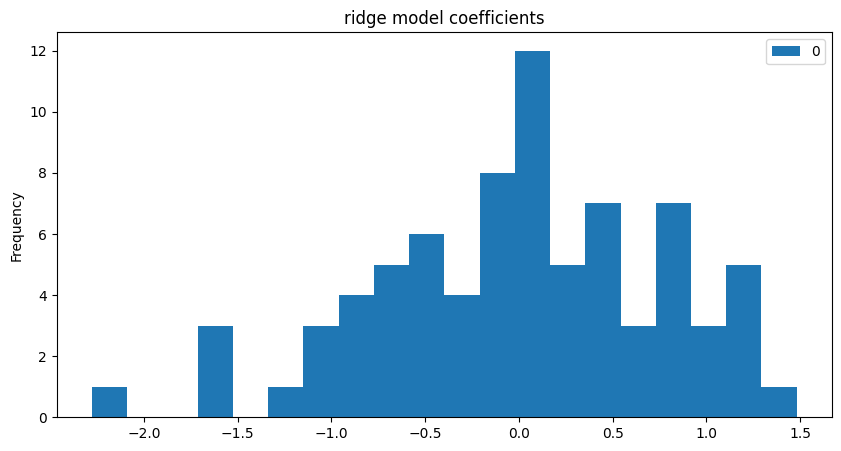

In [624]:
# plot the distribution of the coefficients of the linear model
pd.DataFrame(model.coef_[0]).plot(kind='hist', bins=20, title='linear model coefficients')
pd.DataFrame(ridge.coef_[0]).plot(kind='hist', bins=20, title='ridge model coefficients')

The ridge model forces us to make use of all the variables more or less evenly. 